# Implementing Logistic Regression from Scratch

This template is provided for you to a logistic regression model from scratch using your project dataset.
Fill in the __None__ parts in this template.

__Notes:__
1. Please follow the instructions in this notebook to complete all the tasks as specified.
2. Please, do not change the order of the cells, and do not modify the test cells provided to verify if you have implemented the functions correctly.

## Importing the required packages

In [62]:
# Put your code here (3 lines of code)
# Import the required packages: numpy, pandas, matplotlib.pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Project dataset

In the following cell, load the dataset for the project.

__Alternatively, you can load a clean dataset that is ready to train a logistic regression model. This way, you won’t need to handle missing values or encode categorical variables.__

In [63]:
# Put your code here (1 line of code)
# Load your project dataset 
data = pd.read_excel('diabetic_data_233172.xlsx')
# Let's have a look on your dataset
data.head(n=3)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO


## Response and feature selection

Select a single variable from your project dataset as the response variable for your logistic regression model and identify at least three potential features. You will not be evaluated based on the number of features you consider; the effectiveness of your implementation is more important. 

In [64]:
# Put your code here (1 line of code)
# Choose your target variable
target_variable = ['diabetesMed']

# Put your code here (1 line of code)
# Choose your feature variables
feature_variables = ['insulin', 'change', 'time_in_hospital', 'num_medications' ]

In the following cell, please remove the missing values (if necessary)

In [65]:
missing_values = data.isnull().sum()
data = data.dropna()

In the following cell, use LabelEncoder and OrdinalEncoder from scikit-learn to encode the categorical features you have chosen for your logistic regression model, if there are any. 

In [66]:
# Put your code here
# Feel free to use as many lines as you need to encode the categorical variables.
# convert categorical data into numerical data using OrdinalEncoder and LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

data['diabetesMed'] = lab_enc.fit_transform(data[['diabetesMed']]).astype(int)

ord_enc = OrdinalEncoder()
data['change'] = ord_enc.fit_transform(data[['change']]).astype(int)
data['insulin'] = ord_enc.fit_transform(data[['insulin']]).astype(int)

c:\Users\gabri\anaconda3\envs\Block_B\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###  Define features and Response

Now, let's define the feature and target variables.

In [67]:
# Put your code here (2 lines of code)
# Define the features and target variables
Features = data[feature_variables]
Target = data[target_variable]

### Training and test sets

Now, we need to split the dataset into training and test sets.

In [68]:
# Split your dataset into training and test sets
# You can use scikit-learn to that end
from sklearn.model_selection import train_test_split
Features_train, Features_test, Target_train, Target_test = train_test_split(Features, Target, test_size=0.2, random_state=58)

print(f"Training data shape: {Features_train.shape}, {Target_train.shape}")
print(f"Test data shape: {Features_test.shape}, {Target_test.shape}")

Training data shape: (238, 4), (238, 1)
Test data shape: (60, 4), (60, 1)


### Feature Normalization

Here, we use the `MinMaxScaler` to normalize the range of features in the dataset, transforming the data so that all feature values fall between 0 and 1.

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(Features_train)
Y_train = Target_train.to_numpy()

### Important Note


To use this template for building your model, X and Y should be  two-dimensional numpy arrays. 

Let's define the number of observations and features in the following cell.

In [70]:
# Put your code here (2 lines of code)
# Define the number of observations and the features (predictors)

m = 10000
print('Number of observations:', m)

p = 4
print('Number of features:', p)

Number of observations: 10000
Number of features: 4


You have to add 1 to the related row for each observation; i.e. we need to change X to the following form:

$$ X= \left[ \begin{array}{ccccc} 1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_p^{(1)}  \\  1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_p^{(2)} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\
   1 & x_1^{(m)} & x_2^{(m)} & \cdots & x_p^{(m)}  \end{array} \right]$$

In [71]:
# Put your code here (1 line of code)
# Add 1 to each row of X (you can use np.insert)
X = np.insert(X_train, 0, 1, axis= 1)

print(X)

[[1.         0.66666667 0.         0.23076923 0.44117647]
 [1.         0.33333333 1.         0.38461538 0.14705882]
 [1.         0.33333333 1.         0.23076923 0.55882353]
 ...
 [1.         0.66666667 1.         0.30769231 0.61764706]
 [1.         0.33333333 0.         0.38461538 0.64705882]
 [1.         0.         0.         0.15384615 0.29411765]]


In [72]:
# Let's define Y variable
Y = Y_train
print(Y)

[[1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]


Use `np.random.seed` to set the seed for the NumPy pseudo-random number generator. The pseudo-random number generator produces sequences of numbers that appear random, but they are actually determined by an initial seed value. By setting the seed, you ensure that you get reproducible results when generating random numbers. Don't change the seed number in the following cell.

In [73]:
np.random.seed(1979)

## Logistic Regression without Regularization

### Initilize Parameters


Initialize the model parameters with random values. Write a function to initialize the parameters with random values. Note that, due to having an intercept in the linear regression model, the number of parameters should be $p+1$.

In [74]:
def Init_param(p):
    # p (scalar): number of parameters
    # Output:
    # W: 1-dimensional numpy array
    # Put your code here (1 line of code)
    # Use np.random.rand to initialize the parameters
    # Note that W should have p+1 parameters
    W =  np.random.rand(p + 1)
    
    return(W)

#### Test Init_param function

Now, let's check your `Init_param` function. Run the followng cell:

In [75]:
Init_param(3)

array([0.97820931, 0.75000953, 0.55963445, 0.10992111])

The expected value is as follows:

__array([0.97820931, 0.75000953, 0.55963445, 0.10992111])__

### Hypothesis Function

The hypothesis (or prediction) in logistic regression is given by the sigmoid function, which is applied element-wise:

$Y = \sigma(XW) = \dfrac{1}{1 + e^{-XW}}$
    
Here, $Y$ produces a vector of predictions of shape $(m\times 1)$,

where:
- $X$ is the matrix of features for all training examples, with each row representing a different example and each column representing a different feature.
- $W$ is the vector of coefficients (including the bias term)
- One can define $X$,  $W$, and $Y$ as follows:

$ X= \left[ \begin{array}{ccccc} 1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_p^{(1)}  \\  1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_p^{(2)} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\
   1 & x_1^{(m)} & x_2^{(m)} & \cdots & x_p^{(m)}  \end{array} \right]$, 
$\qquad W = \left[\begin{array}{c} w_0 \\ w_1 \\ \vdots \\w_p \end{array} \right]$,
$\qquad Y = \left[\begin{array}{c}  y_1 \\ y_2 \\ \vdots \\y_m \end{array} \right]$ 
   
where: 
- $m$ is the number of training examples.
- $p$ is the number of features.
- $X$ is the matrix of features.
- $Y$ is the vector of actual output values.

In [76]:
def sig_fun(X, W):
    
    # X: a 2-dimensional numpy array containg all the features 
    # W: 1-dimensional numpy array containg the weights of the model
    
    
    # Put your code here (1 line of code)
    # Implement the sigmoid function
    Y = 1/(1 + np.exp(- np.dot(X, W)))
    
    # Make Y a two dimensional arrray
    Y = np.expand_dims(Y, axis=1)
    
    return Y

#### Test sig_fun

Now, let's check `sig_fun` that you have already implemented. Run the following cell:

In [77]:
W1 = np.array([0.8, 0.7 , -0.5 , 0.3])
X1 = np.array([[0.33, 0.5, -0.1,0.7],[-0.6, -0.2, 0.9, 0.7]])
sig_fun(X1, W1)

array([[0.70557733],
       [0.29733935]])

The expected output is:

array([0.70557733],

     [0.29733935]])

### Compute Cost Function 


In this section, you are supposed to write a function to calculate the cost function. The cost function $J(W)$ for logistic regression in vectorized form is:

$J(W)= - \dfrac{1}{m}\left[Y^\top \log(\hat{Y}) + (\mathbf{1}-Y)^\top \log (\mathbf{1}- \hat{Y})\right]$
    
note that $\mathbf{1}$ is a column vector of ones; $\hat{Y}$ represents the predictions computed by the sigmoid function;  $\log(\hat{Y})$ and $\log (\mathbf{1}- \hat{Y})$  are element-wise operations.

In [78]:
def cost_fun(X,Y,W):
    # X: a 2-dimensional numpy array containg all the features 
    # Y: a 2-dimensional numpy array containing all the response variables
    # W: 1-dimensional numpy array containg the weights of the model
    
    # Put your code here ( 1line of code)
    # Define the number of observations
    m = X.shape[0]
    
    # Put your code here (1 line of code)
    # Compute the predictions using W and X
    # Use sig_fun to compute the Y_pred
    Y_pred = sig_fun(X, W)
    
    # To avoid log(0) you need the following line of code
    # Refer to the documentation of np.clip for further explanations.
    Y_pred = np.clip(Y_pred, 1e-15, 1 - 1e-15)
    
    
    # Put your code here (1 line of code)
    # Define the cost function using the vectorized form
    J = -(1/m) * np.sum(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred))
    
    
    return np.squeeze(J)

#### Test cost_fun

Now, let's check your already developed `cost_fun` function by running the following cell. Compare your result with the expected value. 

In [79]:
X1 = np.array([[1., 0.70175439, 1., 0.5],
               [1., 0.49122807, 0.33333333, 0.7],
               [1., 0.74561404, 0.66666667, 0.6]])
          
Y1 = np.array([[1],
               [1],
               [0]])
          
W1 = np.array([3, 2, -1, 5])
cost_fun(X1,Y1,W1)

2.2763863157139896

The expected value is:

**array(2.27638632)**

### Gradient Descent Update Rule without Regularization


Now, you can implement Gradient Descent update rule (without regularization) utilizing your previousely developed functions. Actually, you have to implement the following rule here:

$$W := W - \alpha \dfrac{1}{m}X^\top(\hat{Y}-Y)$$

In [80]:
def grad_descent_step_wr(X, Y, W, alf):
    # X: a 2-dimensional numpy array containg all the features 
    # Y: a 2-dimensional numpy array containing all the response variables
    # W: 1-dimensional numpy array containg the weights of the model
    # alf: learning rate
    
    # Put your code here (1 line of code)
    # Define the number of observations
    m = X.shape[0]
    
    # Put your code here (1 line of code)
    # Compute the predictions using W and X
    # Use sig_fun to compute the Y_pred
    Y_pred = sig_fun(X, W)
    
    # Add one dimension to make it suitable for updating
    W = np.expand_dims(W, axis=1)
    
    # Put your code here (1 line of code)
    # Implement the update rule
    W_new = W - alf * (1/m) * np.dot(X.T, (Y_pred - Y))
    
    return np.squeeze(W_new)

#### Test grad_descent_step_wr

Now, let's check the `grad_descent_step_wr` function (without regularization). Run the following cell and compare the obtained result with the expected one.

In [81]:
X2 = np.array([[1., 0.70175439, 1., 1.],
              [1., 0.49122807, 0.33333333, 1.],
              [1., 0.74561404, 0.66666667, 1.]])
          
Y2 = np.array([[1],
              [1],
              [0]])

W2 = np.array([3, 2, -1, 5])

grad_descent_step_wr(X2, Y2, W2, alf=0.01)

array([ 2.99666849,  1.9975158 , -1.00222095,  4.99666849])

The expected value is as follows:

**array([ 2.99666849,  1.9975158, -1.00222095,  4.99666849])**

### Implement Gradient Descent Algorithm without Regularization


Now, it is time to put together all the previously developed functions to build a linear regression model from scratch.

In [82]:
# Put your code here (1 line of code)
# Choose an initial value for model parameters, use Init_param function
w_init = Init_param(p)

# Put your code here (1 line of code)
# Choose the learning rate
alf = 0.01

# Put your code here (1 line of code)
# Choose the number of iterations
N = 10000

# Save the values for W and the COST values
W = np.zeros((p + 1, N+1))

COST = np.zeros(N + 1)

# Save initial values
W[:,0] = np.squeeze(w_init)
COST[0] = cost_fun(X, Y, w_init)

# This is a for loop to implement the Gradient Descent algorithm
for n in range(N):
    
    # Put your code here (1 line of code)
    # Use grad_descent_step_wr to update the values for w
    w_new = grad_descent_step_wr(X, Y, W[:,n], alf)
    
    # Save the new value for w
    W[:, n + 1] = w_new
    
    # Put your code here (1 line of code)
    # Save the cost value for newly obtained w using the cost_fun
    COST[n+1] = cost_fun(X, Y, w_new)


#### Plot the cost function values versus iteration

Now, it is time to plot the cost function versus iterations to check the convergence of the gradient descent algorithm.

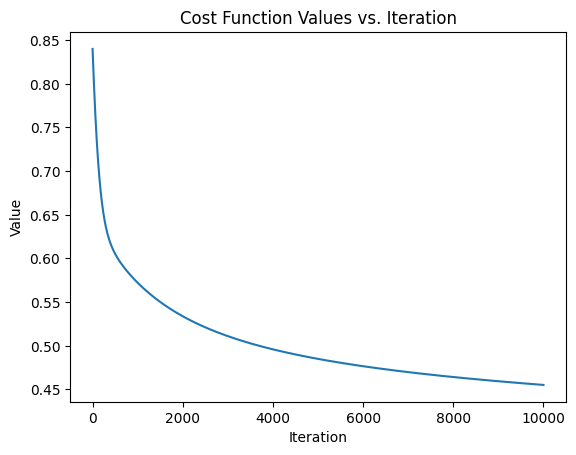

In [83]:
# Put your code here (1 line of code)
# Plot the cost function values per iteration; these values are already saved in COST.
plt.plot(range(N + 1), COST)

plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Cost Function Values vs. Iteration')
plt.show()

#### Plot the model coefficients versus iteration

Now, let's see how the coefficients converge to the optimal values. In fact, we need to plot the coefficients versus the algorithm's iterations.

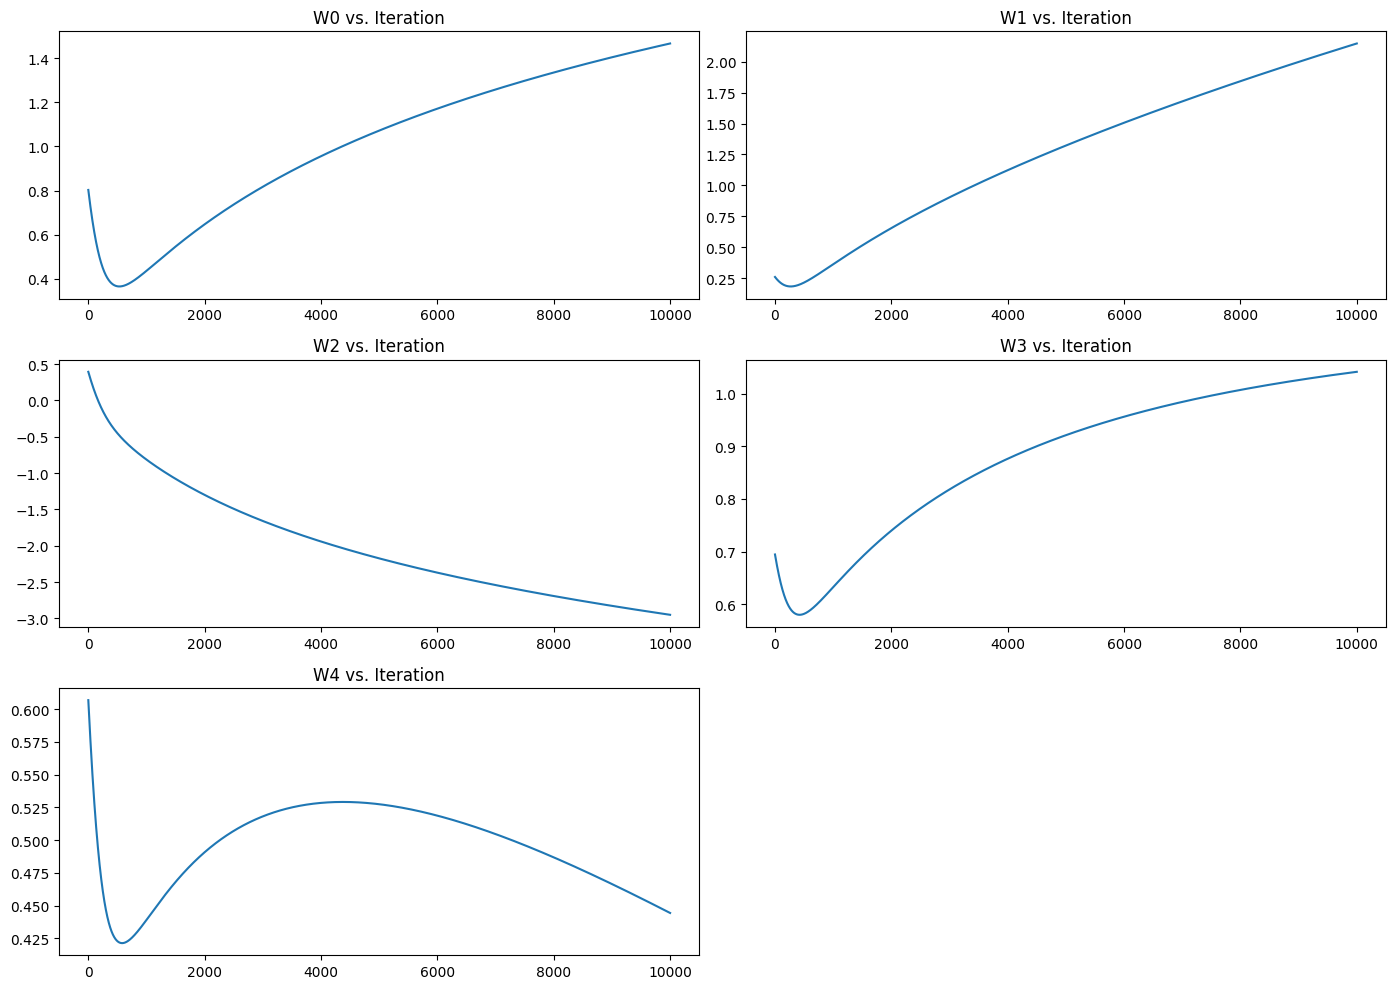

In [84]:
# Choose number of rows and columns for illustrating W vs. Iteration
# Create a grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 10))  

# Plot on the first subplot W[0] vs. Iteration
axes[0, 0].plot(range(N+1), W[0, :])
axes[0, 0].set_title("W0 vs. Iteration")

# Plot on the second subplot W[1] vs. Iteration
axes[0, 1].plot(range(N+1), W[1, :])
axes[0, 1].set_title("W1 vs. Iteration")

# Plot on the third subplot W[2] vs. Iteration
axes[1, 0].plot(range(N+1), W[2, :])
axes[1, 0].set_title("W2 vs. Iteration")

# Plot on the fourth subplot W[3] vs. Iteration
axes[1, 1].plot(range(N+1), W[3, :])
axes[1, 1].set_title("W3 vs. Iteration")

# Plot on the fifth subplot W[4] vs. Iteration (if you have 5 features)
axes[2, 0].plot(range(N+1), W[4, :])
axes[2, 0].set_title("W4 vs. Iteration")

# If you have more features, you can add additional subplots here...

fig.delaxes(axes[2, 1])
# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#### Find the optimal coefficient values

Now, it is time to define the model parameters. In fact, they are the last values saved.

In [85]:
# Put your code here (1 line of code)
# Find the last obtained parameter values from the algorithm; 
# you have already save all the values in W
W_opt = W[:, -1]

print('The obtained coefficient values are:\n',W_opt)

The obtained coefficient values are:
 [ 1.46690757  2.14763597 -2.95068623  1.04186725  0.44433952]


### Prediction 

Now, it is time to create a prediction function, which we will later use for model evaluation. This function computes the labels for a set of observations.

In [86]:
def pred_fun(X, W, threshold = 0.5):
    
    # X: a 2-dimensional numpy array containg all the features for the test set 
    # W: 1-dimensional numpy array containg the weights of the model
    
    # Put your code here (1 line of code)
    # Compute the probability using the sig_fun
    prob = sig_fun(X, W)
    
    # Put your code here (1 line of code)
    # Define the label based on the computed probabilities and threshold
    pred = (prob >= threshold).astype(int)
    
    return pred  

#### Test pred_fun

Now, you can test your `pred_fun` to ensure it is implemented correctly. Run the following cell and compare its output with the expected result.

In [87]:
W1 = np.array([0.8, 0.7 , -0.5 , 0.3])
X1 = np.array([[0.33, 0.5, -0.1,0.7],[-0.6, -0.2, 0.9, 0.7]])
pred_fun(X1, W1, threshold = 0.5)

array([[1],
       [0]])

Expected out put is: 

array([ [ 1 ],

    [0]])

### Evaluate your model using a test dataset

In the following cell, you are asked to implement the accuracy function to evaluate your trained model. First, you need to compute the labels for the test set, and then calculate the accuracy for the test set.

In [88]:
def eval_fun(X,Y, W_opt, threshold=0.5):
    
    # X: a 2-dimensional numpy array containg all the features for the test set 
    # Y: a 2-dimensional numpy array containing true labels
    # W_opt: 1-dimensional numpy array containg the weights of the model
    # Threshold is an integer; if the probability is higher than it, the label is set to 1.
    
    # Put your code here (1 line of code)
    # You have to use X and Y to evaluate your model
    # Use pred_fun that you have already developed
    Y_pred = pred_fun(X, W_opt, threshold)
    
    # Put your code here (1 line of code)
    # compute the accuracy
    accuracy = np.mean(Y_pred == Y)
    
    return accuracy

#### Test eval_fun

Now that you have implemented the `eval_fun`, please run the following cell to ensure it works correctly and compare its output with the expected result.

In [89]:
W3 = np.array([0.8, 0.7 , -0.5 , 0.3])
X3 = np.array([[0.33, 0.5, -0.1,0.7],[-0.6, -0.2, 0.9, 0.7], [0.4, 0.2, 0.8, 0.7], [0, 0.2, 1, 0.6]])
Y3 = np.array([[1], [0], [0],[0]])
eval_fun(X3,Y3, W3, threshold=0.5)

0.75

Expected output: 0.75

Now, you have reached the final step of the training cycle: evaluating your model. Specifically, you are asked to compute the accuracy of your model using `eval_fun`.

In [90]:
# Note: You need to transform the test set first.
# Additionally, add 1 to each feature vector.
X_test = scaler.transform(Features_test)
X_t = np.insert(X_test,0,1, axis=1)

Y_test = Target_test.to_numpy()

# Put your code here (1 line of code)
# Use eval_fun to compute the accuracy of your model
accuracy = eval_fun(X_t, Y_test, W_opt, threshold= 0.5)
print (accuracy)

0.8666666666666667


### Comparison with Scikit-Learn

Now that you have trained a model, let's train the model using scikit-learn to make sure that your implementation is correct.

In [91]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, np.squeeze(Y_train))

# Let's create a vector of parameters similar to what we obtained using the Gradient Descent algorithm.
W_scikitLeran = np.concatenate((model.intercept_, np.squeeze(model.coef_)))
W_scikitLeran

array([ 1.87934368,  2.6675191 , -3.27933457,  0.82011807, -0.04859071])

Now let's have a look again on your obtained W_opt:

In [92]:
W_opt

array([ 1.46690757,  2.14763597, -2.95068623,  1.04186725,  0.44433952])

Let's also compute the accuracy using scikit-learn.

In [93]:
from sklearn.metrics import accuracy_score
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9000


Your model parameter vector needs to be close to that of scikit-learn. If it is not the case, try fine-tuning the hyperparameters to get similar results. However, don't worry if there are small differences.

*****

## Logistic Regression with Regularization

 ### Compute Cost Function with Regularization

In this section, you implement a function to calculate the cost function with regularization. Actually, you need to implement the following cost function:

$J(W)= - \dfrac{1}{m}\left[Y^\top \log(\hat{Y}) + (\mathbf{1}-Y)^\top \log (\mathbf{1}- \hat{Y})\right] + \dfrac{\lambda}{2m}W^\top\Pi W$

where 

$\Pi = \left[\begin{array}{cc} 0 & 0_{1\times p}\\ 0_{p\times 1} & I_p \end{array}\right]$

and $\lambda$ is the regularization parameter.

Note that

$\hat{Y} = \sigma(XW) = \dfrac{1}{1 + e^{-XW}}$

In [113]:
def cost_fun_reg(X, Y, W, lam):
    # X: a 2-dimensional numpy array containg all the features 
    # Y: a 2-dimensional numpy array containing all the response variables
    # W: 1-dimensional numpy array containg the weights of the model
    # lam: regularization parameter
    
    # Put your code here (1 line of code)
    # Define the number of observations
    m = X.shape[0]
    
    # Put your code here (1 line of code)
    # Define the number of features
    # Note that we have already added 1 to every observation 
    p = X.shape[1] - 1

    
    # Put your code here (1 line of code)
    # Compute the predictions using W and X
    # Use sig_fun to compute the Y_pred
    Y_pred = sig_fun(X, W)
    
    # To avoid log(0) you need the following line of code
    # Refer to the documentation of np.clip for further explanations.
    Y_pred = np.clip(Y_pred, 1e-15, 1 - 1e-15)
    
    # Define matrix PI (1 line of code)
    # Use np.block() np.zeros() and np.eye()
    # PI = np.block([[np.zeros((1, 1)), np.zeros((1, W.shape[0] - 1))],  [np.zeros((W.shape[0] - 1, 1)), np.eye(W.shape[0] - 1)]])
    PI = np.eye(W.shape[0])
    PI[0, 0] = 0
    
    # Put your code here (1 line of code)
    # Define the cost function using the vectorized form
    J = -(1/m) * (np.dot(Y.T, np.log(Y_pred)) + np.dot((1 - Y).T, np.log(1 - Y_pred))) + (lam / (2 * m)) * np.dot(W.T, np.dot(PI, W))
    
    
    return np.squeeze(J)

#### Test cost_fun_reg

Run the following cell to ensure that you have implemented `cost_fun_reg` correctly:

In [114]:
X1 = np.array([[1., 0.70175439, 1., 0.5],
               [1., 0.49122807, 0.33333333, 0.7],
               [1., 0.74561404, 0.66666667, 0.6]])
          
Y1 = np.array([[1],
               [1],
               [0]])
          
W1 = np.array([3, 2, -1, 5])

cost_fun_reg(X1,Y1,W1, 3)

array(17.27638632)

Expected output: __array(-27.72361368)__

### Gradient Descent Update Rule with Regularization

Now it is time to implement Gradient Descent update rule (with regularization) utilizing your previousely developed functions. Actually, you have to implement the following rule here:

$$W := W  - \dfrac{\alpha}{m} \left[X^\top(\hat{Y} - Y) + \lambda \Pi W \right]$$ 

where

$$\Pi = \left[\begin{array}{cc} 0 & 0_{1\times p} \\ 0_{p\times 1} & 0\end{array} \right]$$

and  $\lambda$ is the regularization parameter, $p$ is the number of features.

In [96]:
def grad_descent_step_reg(X, Y, W, alf, lam):
    # X: a 2-dimensional numpy array containg all the features 
    # Y: a 2-dimensional numpy array containing all the response variables
    # W: 1-dimensional numpy array containg the weights of the model
    # alf: learning rate
    # lam: regularization parameter
       
    # Put your code here (1 line of code)
    # Define the number of observations
    m = X.shape[0]
    
    # Put your code here (1 line of code)
    # Define the number of features
    # Note that we have already added 1 to every observation 
    p = 4
    
    # Put your code here (1 line of code)
    # Compute the predictions using W and X
    # Use sig_fun to compute the Y_pred
    Y_pred = sig_fun(X, W)
    
    # Add one dimension to make it suitable for updating
    W = np.expand_dims(W, axis=1)
    
    # Define matrix PI (1 line of code)
    # Use np.block() np.zeros() and np.eye()
    PI = np.block([[np.zeros((1, 1)), np.zeros((1, W.shape[0] - 1))],  [np.zeros((W.shape[0] - 1, 1)), np.eye(W.shape[0] - 1)]])
    
    # Put your code here (1 line of code)
    # Implement the update rule
    W_new = W - (alf/m)*(np.dot(X.T, (Y_pred - Y)) + lam * np.dot(PI, W))
    
    return np.squeeze(W_new)

#### Test grad_descent_step_reg

Now, let's check the `grad_descent_step_reg` function (Gradient Descent with Regularization). Run the following cell and compare the obtained result with the expected one.

In [116]:
X2 = np.array([[1., 0.70175439, 1., 1.],
              [1., 0.49122807, 0.33333333, 1.],
              [1., 0.74561404, 0.66666667, 1.]])
          
Y2 = np.array([[1],
              [1],
              [0]])

W2 = np.array([3, 2, -1, 5])

grad_descent_step_reg(X2, Y2, W2, alf=0.01, lam=5)

array([ 2.99666849,  1.96418246, -0.98555429,  4.91333515])

Expected output: 
    
__array( [ 2.99666849,    1.96418246,   -0.98555429,    4.91333515] )__

### Implement Gradient Descent Algorithm with Regularization

Now, it is time to put together all the previously developed functions to build a logistic regression model with regularization.

In [117]:
# Put your code here (1 line of code)
# Choose an initial value for model parameters, use Init_param function
w_init = Init_param(p)

# Put your code here (1 line of code)
# Choose the learning rate
alf = 0.001

# Put your code here (1 line of code)
# Choose the regularization parameter
lam = 20

# Put your code here (1 line of code)
# Choose the number of iterations
N = 15000

# Save the values for W and the COST values
W = np.zeros((p + 1, N+1))
COST_reg = np.zeros(N + 1)

# Save initial values
# Use cost_fun_reg to compute the initial value for cost function
W[:,0] = np.squeeze(w_init)
COST_reg[0] = cost_fun_reg(X, Y, w_init, lam)

# This is a for loop to implement the Gradient Descent algorithm
for n in range(N):
    
    # Put your code here (1 line of code)
    # Use grad_descent_step_reg to update the values for w
    w_new = grad_descent_step_reg(X, Y, W[:,n], alf, lam)
    
    # Save the new value for w
    W[:, n + 1] = w_new
    
    # Put your code here (1 line of code)
    # Save the cost value for newly obtained w using the cost_fun_reg
    COST_reg[n+1] = cost_fun_reg(X, Y, W[:, n + 1], lam )


#### Plot the cost function values versus iteration

Now, it is time to plot the cost function against the number of iterations to gain insight into how the Gradient Descent algorithm converges to its final value.

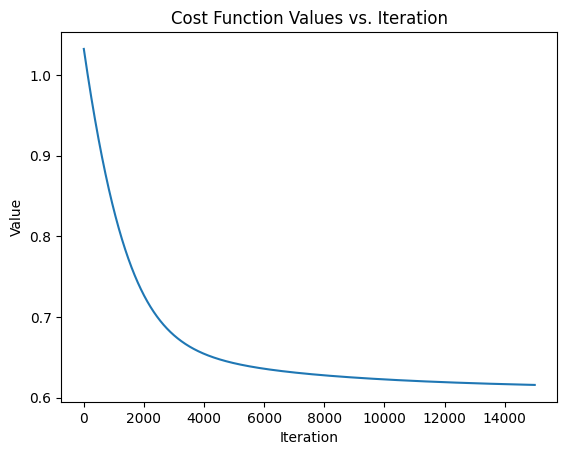

In [118]:
# Put your code here (1 line of code)
# Plot the cost function values per iteration; these values are already saved in COST_reg.
plt.plot(range(N + 1), COST_reg)

plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Cost Function Values vs. Iteration')
plt.show()

#### Plotting Model Coefficients Against Iterations (with Regularization)

Now, let's see how the coefficients converge to the optimal values. In fact, we need to plot the coefficients versus the algorithm's iterations.

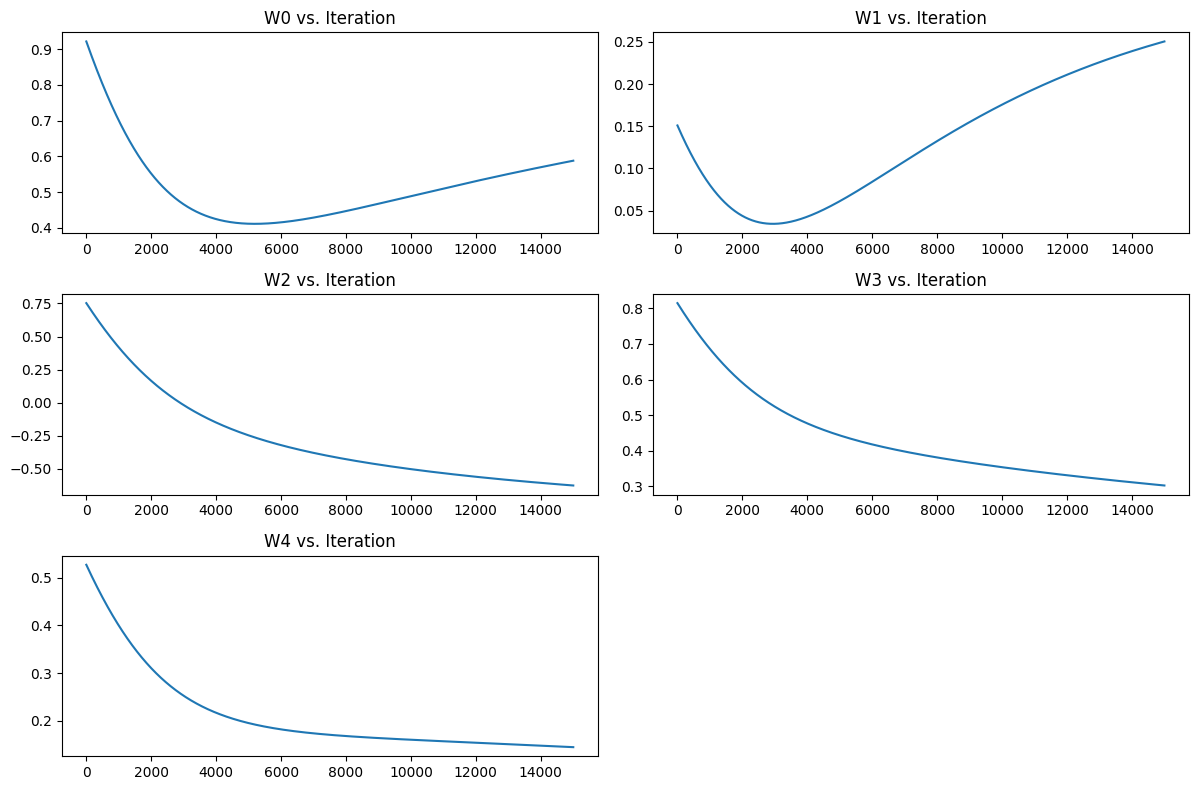

In [119]:
# Put your code here (1 line of code)
# Choose number of rows and columns for illustrating W vs. Iteration
# Create a grid of subplots 
# You can change the number of rows and columns in the subplot
# change the figsize in the following code if you want
N = np.arange(len(W[0]))
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Plot on the first subplot W[0] vs. Iteration
axes[0, 0].plot(N + 1, W[0])
axes[0, 0].set_title("W0 vs. Iteration")

# Put your code here (1 line of code)
# Plot on the second subplot W[1] vs. Iteration
axes[0, 1].plot(N + 1, W[1])
axes[0, 1].set_title("W1 vs. Iteration")

# Put your code here (1 line of code)
# Plot on the third subplot W[2] vs. Iteration
axes[1, 0].plot(N + 1, W[2])
axes[1, 0].set_title("W2 vs. Iteration")


# Put your code here (1 line of code) 
# You can remove it if you have just 2 features
# Plot on the fourth subplot W[3] vs. Iteration
axes[1, 1].plot(N + 1, W[3])
axes[1, 1].set_title("W3 vs. Iteration")


# Put your code here (1 line of code) 
# You can remove it if you have just 3 features
# Plot on the fifth subplot W[4] vs. Iteration
axes[2, 0].plot(N + 1, W[4])
axes[2, 0].set_title("W4 vs. Iteration")


# Add more if you have more than 3 features
# ......

# Adjust layout and show the plots
fig.delaxes(axes[2, 1])
plt.tight_layout()
plt.show()

### Find the optimal coefficient values

Now, it is time to retrieve the model parameters obtained using the Gradient Descent algorithm. These are, in fact, the last saved values.

In [120]:
# Put your code here ( 1 line of code)
# Find the last obtained parameter values from the algorithm; 
# you have already save all the values in W
W_opt_reg = W[-1]

print('The obtained coefficient values are :',W_opt_reg)

The obtained coefficient values are : [0.52723466 0.52708772 0.52694082 ... 0.14471609 0.14471292 0.14470975]


### Evaluate your model using a test dataset

Note that, for ease of evaluation, there is no difference between the regularized and unregularized forms, meaning that you can use the same `eval_fun` you have already implemented.

In [121]:
# Put your code here (1 line of code)
# Use eval_fun to compute the accuracy of your model
accuracy = eval_fun(X, Y, W_opt, threshold = 0.5)
print (accuracy)

0.7815126050420168


## Hypreparameter Tuning

You managed to implement logistic regression with regularization—__Congratulations__!

Now, it's time to find an appropriate set of hyperparameters. Please try at least three different sets of hyperparameters and fill in the table below. The table is pre-filled with some arbitrary values, but you should modify them based on your implementation.
We have considered both implementations—with and without regularization—where the $N$ and $\alpha$ values are the same for each set. Please follow this approach to enable a fair comparison of model performances. Replace the __None__ values in the table with your chosen hyperparameter sets.

__Note__: You may try more than three sets, but for the sake of documentation, please include three sets that you believe best demonstrate how hyperparameters affect the final model performance. 

| Set |  Method               | $N$    | $\alpha$ | $\lambda$ | RMSE | 
|-----|:----------------------|--------|----------|-----------|------|
|Set 1| Without Regularization|  10000 | 0.01     |  ---      | 1.82 |
|     | With Regularization   |  10000 | 0.01     |   10      | 1.81 |   
|Set 2| Without Regularization|  15000 | 0.001    |  ---      | 1.65 |
|     | With Regularization   |  15000 | 0.001    |   20      | 1.66 |
|Set 3| Without Regularization|  7000  | 0.005    |  ---      | 1.93 |
|     | With Regularization   |  7000  | 0.005    |   30      | 1.92 |

#### Best hyperparameters

Based on the hyperparameter tuning you have done, what are the best hyperparameters you found? (Fill in the 'None' values in the table below.)

__Best hyperparameters__:

|     Method            | $N$    | $\alpha$ | $\lambda$ | RMSE | 
|:----------------------|--------|----------|-----------|------|
| None                  |  None  | None     |  None     | None |    